In [2]:
%load_ext autoreload
%autoreload 2

from time import time
from pathlib import Path
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from medicane_utils.load_files import load_cyclones_track_noheader
from medicane_utils.geo_const import latcorners, loncorners



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Apro tutti i file CL di Manos per fare un solo DataFrame

In [5]:
manos_track_files_dir = Path("../CompositeTracks_MedCyclones_Flaounas_etal_2023")
tracks_file_prefix_templ = "TRACKS_CL§.dat"  


def get_alltrack_files(manos_track_files_dir, tracks_file_prefix_templ):
    """
    # ritorna una lista di dataframe
    """
    
    alltrack_files = [manos_track_files_dir / tracks_file_prefix_templ.replace('§', f"{i}") for i in range(2,11)]
    [print(f"Trovato: {str(t)}") for t in alltrack_files]

    alldfs = []
    i=2
    for tracks_file in alltrack_files:
        df_tracks = load_cyclones_track_noheader(tracks_file)
        df_tracks['time'] = pd.to_datetime(df_tracks['time'])
        alldfs.append(df_tracks)
        print(f"Righe presenti nel file CL{i}: {df_tracks.shape[0]}")
        i+=1
        
    return alldfs

alldfs = get_alltrack_files(manos_track_files_dir, tracks_file_prefix_templ)

Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL2.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL3.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL4.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL5.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL6.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL7.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL8.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL9.dat
Trovato: ../CompositeTracks_MedCyclones_Flaounas_etal_2023/TRACKS_CL10.dat
Righe presenti nel file CL2: 616780
Righe presenti nel file CL3: 470106
Righe presenti nel file CL4: 347437
Righe presenti nel file CL5: 267345
Righe presenti nel file CL6: 199505
Righe presenti nel file CL7: 139135
Righe presenti nel file CL8: 93876
Righe presenti nel file CL9: 50525
Righe presenti nel file CL10: 19849


#### conto il numero di cicloni unici per ogni file

In [3]:
[df.id_cyc.nunique() for df in alldfs]
# -> abbiamo 12750 cicloni in tutto nel CL2, e 206 nel CL10

[12750, 8425, 5445, 3808, 2638, 1716, 1089, 565, 206]

### verifico se gli id ciclone siano gli stessi

In [25]:
# prendo un ciclone per esempio
idc = alldfs[0].id_cyc.unique()[30] 
idc

'00000031'

In [30]:
m0 = alldfs[0].id_cyc == idc

In [31]:
m1 = alldfs[-1].id_cyc == idc

In [32]:
alldfs[0][m0]

,id_cyc,lat,lon,time
1730,00000031,30.130,31.380,1979-02-26 08:00:00
1731,00000031,30.387,31.323,1979-02-26 09:00:00
1732,00000031,30.660,31.245,1979-02-26 10:00:00
1733,00000031,30.871,31.262,1979-02-26 11:00:00
1734,00000031,30.982,31.444,1979-02-26 12:00:00
1735,00000031,31.026,31.759,1979-02-26 13:00:00
1736,00000031,31.078,32.130,1979-02-26 14:00:00
1737,00000031,31.217,32.538,1979-02-26 15:00:00
1738,00000031,31.539,33.041,1979-02-26 16:00:00
1739,00000031,32.085,33.645,1979-02-26 17:00:00


In [33]:
alldfs[-1][m1]

,id_cyc,lat,lon,time
3083,00000031,37.020,-1.550,1983-11-16 07:00:00
3084,00000031,37.228,-1.302,1983-11-16 08:00:00
3085,00000031,37.510,-0.948,1983-11-16 09:00:00
3086,00000031,37.853,-0.511,1983-11-16 10:00:00
3087,00000031,38.210,-0.078,1983-11-16 11:00:00
...,...,...,...,...
3194,00000031,30.388,20.940,1983-11-20 22:00:00
3195,00000031,30.296,21.156,1983-11-20 23:00:00
3196,00000031,30.233,21.417,1983-11-21 00:00:00
3197,00000031,30.196,21.708,1983-11-21 01:00:00


### no -> quindi poi per il master df resettiamo l'index

In [45]:
lat=30.388
lon=20.940
time=pd.to_datetime("1983-11-20 22:00:00")

In [46]:
mascherone = (alldfs[0].lat==lat) & (alldfs[0].lon==lon) & (alldfs[0].time==time)

In [47]:
alldfs[0][mascherone]

,id_cyc,lat,lon,time
65240,00001315,30.388,20.94,1983-11-20 22:00:00


In [48]:
mascherone1 = (alldfs[-1].lat==lat) & (alldfs[-1].lon==lon) & (alldfs[-1].time==time)
alldfs[-1][mascherone1]

,id_cyc,lat,lon,time
3194,00000031,30.388,20.94,1983-11-20 22:00:00


##### verifico che le coordinate e i tempi almeno siano uguali  (-> neanche: alcuni CL hanno coordinate leggermente diverse)

In [55]:
cln = -1

In [103]:
id_unici = alldfs[cln].id_cyc.unique()
cols = ['lat','lon','time']
for idc in id_unici:
    mask = alldfs[cln].id_cyc == idc
    righe = alldfs[cln][mask][cols]
    all_rows = righe.merge(alldfs[0][cols], how='left', indicator=True)['_merge'].eq('both')
    all_rows_present = all_rows.all()
    #p = all_rows.sum()/righe.shape[0]
    print(f"id {idc} presente interamente in CL2? {all_rows_present} con {all_rows.sum()} righe su {righe.shape[0]}")

id 00000001 presente interamente in CL2? True con 86 righe su 86
id 00000002 presente interamente in CL2? True con 48 righe su 48
id 00000003 presente interamente in CL2? True con 159 righe su 159
id 00000004 presente interamente in CL2? True con 67 righe su 67
id 00000005 presente interamente in CL2? True con 111 righe su 111
id 00000006 presente interamente in CL2? True con 186 righe su 186
id 00000007 presente interamente in CL2? True con 57 righe su 57
id 00000008 presente interamente in CL2? True con 111 righe su 111
id 00000009 presente interamente in CL2? True con 107 righe su 107
id 00000010 presente interamente in CL2? True con 149 righe su 149
id 00000011 presente interamente in CL2? True con 128 righe su 128
id 00000012 presente interamente in CL2? False con 79 righe su 98
id 00000013 presente interamente in CL2? True con 75 righe su 75
id 00000014 presente interamente in CL2? True con 122 righe su 122
id 00000015 presente interamente in CL2? True con 56 righe su 56
id 00000

In [53]:
righe = alldfs[-1][m1][['lat','lon','time']]
righe

,lat,lon,time
3083,37.020,-1.550,1983-11-16 07:00:00
3084,37.228,-1.302,1983-11-16 08:00:00
3085,37.510,-0.948,1983-11-16 09:00:00
3086,37.853,-0.511,1983-11-16 10:00:00
3087,38.210,-0.078,1983-11-16 11:00:00
...,...,...,...
3194,30.388,20.940,1983-11-20 22:00:00
3195,30.296,21.156,1983-11-20 23:00:00
3196,30.233,21.417,1983-11-21 00:00:00
3197,30.196,21.708,1983-11-21 01:00:00


In [76]:
all_rows_present = righe.merge(alldfs[0][['lat','lon','time']], how='left', indicator=True)#['_merge'].eq('both').all()
all_rows_present

,lat,lon,time,_merge
0,37.010,13.010,2020-12-12 17:00:00,both
1,36.912,13.439,2020-12-12 18:00:00,both
2,36.834,13.829,2020-12-12 19:00:00,both
3,36.739,14.227,2020-12-12 20:00:00,both
4,36.566,14.719,2020-12-12 21:00:00,both
...,...,...,...,...
116,32.956,36.789,2020-12-17 13:00:00,both
117,32.859,36.942,2020-12-17 14:00:00,both
118,32.786,37.073,2020-12-17 15:00:00,both
119,32.722,37.192,2020-12-17 16:00:00,both


In [69]:
righe.merge(alldfs[0][['lat','lon','time']], how='left', indicator=True)['_merge'].eq('both').sum()/righe.shape[0]

1.0

In [101]:
id_es = '00000190'
m = alldfs[-1].id_cyc == id_es
alldfs[-1][m].head(10)

,id_cyc,lat,lon,time
18087,00000190,39.130,18.450,2015-02-08 22:00:00
18088,00000190,39.044,18.979,2015-02-08 23:00:00
18089,00000190,38.834,19.458,2015-02-09 00:00:00
18090,00000190,38.527,19.825,2015-02-09 01:00:00
18091,00000190,38.228,20.043,2015-02-09 02:00:00
18092,00000190,38.002,20.161,2015-02-09 03:00:00
18093,00000190,37.841,20.255,2015-02-09 04:00:00
18094,00000190,37.712,20.335,2015-02-09 05:00:00
18095,00000190,37.598,20.389,2015-02-09 06:00:00
18096,00000190,37.498,20.437,2015-02-09 07:00:00


In [102]:
m10965 = alldfs[0].id_cyc == '00010965'
alldfs[0][m10965].head(10)

,id_cyc,lat,lon,time
531139,00010965,39.130,18.450,2015-02-08 22:00:00
531140,00010965,39.057,19.047,2015-02-08 23:00:00
531141,00010965,38.846,19.521,2015-02-09 00:00:00
531142,00010965,38.535,19.866,2015-02-09 01:00:00
531143,00010965,38.232,20.065,2015-02-09 02:00:00
531144,00010965,38.004,20.171,2015-02-09 03:00:00
531145,00010965,37.841,20.260,2015-02-09 04:00:00
531146,00010965,37.713,20.337,2015-02-09 05:00:00
531147,00010965,37.598,20.390,2015-02-09 06:00:00
531148,00010965,37.498,20.438,2015-02-09 07:00:00


In [99]:
alldfs[-1][m][cols].merge(alldfs[0], how='inner').head(50)

,lat,lon,time,id_cyc
0,39.130,18.450,2015-02-08 22:00:00,00010965
1,37.414,20.510,2015-02-09 08:00:00,00010965
2,37.336,20.634,2015-02-09 09:00:00,00010965
3,37.233,20.807,2015-02-09 10:00:00,00010965
4,37.081,20.964,2015-02-09 11:00:00,00010965
5,36.901,21.078,2015-02-09 12:00:00,00010965
6,36.719,21.201,2015-02-09 13:00:00,00010965
7,36.524,21.366,2015-02-09 14:00:00,00010965
8,36.315,21.587,2015-02-09 15:00:00,00010965
9,36.123,21.901,2015-02-09 16:00:00,00010965


In [35]:
1-(50/133.0)

0.6240601503759399

In [84]:
alldfs[0][alldfs[0][cols] == alldfs[-1][m][cols].iloc[0]].dropna()

,id_cyc,lat,lon,time


# Unisco tutti i CLn in un unico dataframe con l'etichetta di origine

In [6]:
# AGGIUNGIAMO UNA COLONNA SOURCE PER TRACCIARE IL FILE DI ORIGINE
i = 2
for df in alldfs:
    df['source'] = f"CL{i}"
    i += 1

In [37]:
#alldfs[-1]

In [7]:
df_union = pd.concat(alldfs, ignore_index=True)

# Estrai il numero dalla colonna 'source' (es. "CL2" → 2)
df_union['origine_num'] = df_union['source'].str.extract(r'CL(\d+)').astype(int)

# Costruisci l'ID univoco nel formato "02_000206" (origine 2, id_cyc 206)
#df_union['id_cyc_unico'] = (
#    df_union['origine_num'].astype(str).str.zfill(2) + '_' +
#    df_union['id_cyc'].astype(int).astype(str).str.zfill(6)
#)

# Calcola ID unico come intero: 2 cifre origine + 6 cifre id_cyc
df_union['id_cyc_unico'] = df_union['origine_num'] * 1_000_000 + df_union['id_cyc'].astype(int)

# recuperare l'id_cyc originale
def decodifica_id_intero(id_unico):
    origine = id_unico // 1_000_000
    id_cyc = id_unico % 1_000_000
    source = f"CL{origine}"
    return source, id_cyc

# recupero:
#df_union[['source_decod', 'id_cyc_decod']] = df_union['id_cyc_unico'].apply(
#    lambda x: pd.Series(decodifica_id_intero(x)) )


In [12]:
df_union#.id_cyc_unico#[df_union.id_cyc==206]

,lat,lon,time,source,id_cyc_unico
0,48.120,-17.750,1979-01-03 01:00:00,CL2,2000001
1,48.163,-17.447,1979-01-03 02:00:00,CL2,2000001
2,48.143,-16.979,1979-01-03 03:00:00,CL2,2000001
3,48.078,-16.344,1979-01-03 04:00:00,CL2,2000001
4,48.031,-15.679,1979-01-03 05:00:00,CL2,2000001
...,...,...,...,...,...
2204553,32.956,36.789,2020-12-17 13:00:00,CL10,10000206
2204554,32.859,36.942,2020-12-17 14:00:00,CL10,10000206
2204555,32.786,37.073,2020-12-17 15:00:00,CL10,10000206
2204556,32.722,37.192,2020-12-17 16:00:00,CL10,10000206


In [9]:
df_union.drop(columns=['id_cyc', 'origine_num']).to_csv("all_manos_CL.csv", index=False)

In [4]:
df_union = pd.read_csv("all_manos_CL.csv", parse_dates=['time'])#.drop(columns='Unnamed: 0')

In [8]:
df_union

,lat,lon,time,source,id_cyc_unico
0,48.120,-17.750,1979-01-03 01:00:00,CL2,2000001
1,48.163,-17.447,1979-01-03 02:00:00,CL2,2000001
2,48.143,-16.979,1979-01-03 03:00:00,CL2,2000001
3,48.078,-16.344,1979-01-03 04:00:00,CL2,2000001
4,48.031,-15.679,1979-01-03 05:00:00,CL2,2000001
...,...,...,...,...,...
2204553,32.956,36.789,2020-12-17 13:00:00,CL10,10000206
2204554,32.859,36.942,2020-12-17 14:00:00,CL10,10000206
2204555,32.786,37.073,2020-12-17 15:00:00,CL10,10000206
2204556,32.722,37.192,2020-12-17 16:00:00,CL10,10000206


In [6]:
# Calcola start e end time per ogni id_cyc_unico
df_bounds = df_union.groupby('id_cyc_unico')['time'].agg(start_time='min', end_time='max').reset_index()

In [17]:
df_tracks = df_bounds.merge(df_union)

### procedo a filtrare come per il singolo: > 2011 e coordinate del Mediterraneo

In [18]:
df_2011_tracks = df_tracks[df_tracks['time'] > datetime(2011, 1, 1)]
print(f"Per il periodo dal 2011 alla fine dei file  abbiamo: {df_2011_tracks.shape[0]} righe")

Per il periodo dal 2011 alla fine dei file  abbiamo: 531753 righe


In [19]:
tracks_df_MED = df_2011_tracks[
    (df_2011_tracks['lat'] >= latcorners[0]) & (df_2011_tracks['lat'] <= latcorners[1]) &
    (df_2011_tracks['lon'] >= loncorners[0]) & (df_2011_tracks['lon'] <= loncorners[1])
]
print(f"Per il periodo dal 2011 - dentro il Mediterraneo - abbiamo: {tracks_df_MED.shape[0]} righe")

Per il periodo dal 2011 - dentro il Mediterraneo - abbiamo: 383006 righe


In [20]:
tracks_df_MED 

,id_cyc_unico,start_time,end_time,lat,lon,time,source
464444,2009558,2010-12-30 07:00:00,2011-01-03 19:00:00,35.394,13.637,2011-01-01 01:00:00,CL2
464445,2009558,2010-12-30 07:00:00,2011-01-03 19:00:00,35.485,13.613,2011-01-01 02:00:00,CL2
464446,2009558,2010-12-30 07:00:00,2011-01-03 19:00:00,35.556,13.667,2011-01-01 03:00:00,CL2
464447,2009558,2010-12-30 07:00:00,2011-01-03 19:00:00,35.557,13.873,2011-01-01 04:00:00,CL2
464448,2009558,2010-12-30 07:00:00,2011-01-03 19:00:00,35.518,14.134,2011-01-01 05:00:00,CL2
...,...,...,...,...,...,...,...
2204553,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,32.956,36.789,2020-12-17 13:00:00,CL10
2204554,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,32.859,36.942,2020-12-17 14:00:00,CL10
2204555,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,32.786,37.073,2020-12-17 15:00:00,CL10
2204556,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,32.722,37.192,2020-12-17 16:00:00,CL10


### quì voglio solo il 2020, CL7

In [8]:
s = df_union['time'] > datetime(2020, 1, 1)
f = df_union['time'] < datetime(2020, 12, 31)
df_tracks2020 = df_union[s & f]
df_tracks2020_MED = df_tracks2020[
    (df_tracks2020['lat'] >= latcorners[0]) & (df_tracks2020['lat'] <= latcorners[1]) &
    (df_tracks2020['lon'] >= loncorners[0]) & (df_tracks2020['lon'] <= loncorners[1])
]
df_tracks2020_MED_CL7 = df_tracks2020_MED[df_tracks2020_MED.source == 'CL7']

print(f"Per il periodo dal 2020 alla fine dei file - dentro il Mediterraneo - 7 metodi - abbiamo: {df_tracks2020_MED_CL7.shape[0]} righe")


Per il periodo dal 2020 alla fine dei file - dentro il Mediterraneo - 7 metodi - abbiamo: 2249 righe


In [14]:
df_tracks2020_MED_CL7.id_cyc_unico.nunique()

31

### Conto i cicloni unici

In [10]:
#from view_test_tiles import PALETTE
#clsmanos = list(PALETTE.keys())
clsmanos = [f'CL{i}' for i in range(2,11)]
clsmanos

['CL2', 'CL3', 'CL4', 'CL5', 'CL6', 'CL7', 'CL8', 'CL9', 'CL10']

In [15]:
unici_cls = []
for c in clsmanos:
    mask = tracks_df_coord.source == c
    unici = tracks_df_coord[mask].id_cyc_unico.nunique()
    unici_cls.append(unici)

In [16]:
unici_cls, sum(unici_cls) 

([2317, 1596, 1081, 769, 552, 377, 245, 129, 40], 7106)

#### cicloni unici nel 2020, tutti i CL

In [36]:
start, end = pd.to_datetime("2020-01-01"), pd.to_datetime("2021-01-01")
m_sup = tracks_df_coord.time <= end 
m_inf = tracks_df_coord.time >= start
track_2020 = tracks_df_coord[m_sup & m_inf]

In [37]:
mask_CLs = [track_2020.source == c for c in clsmanos]
[track_2020[mask_].id_cyc.nunique() for mask_ in mask_CLs]

[219, 151, 103, 71, 44, 31, 21, 11, 6]

### Istogramma durate cicloni

In [6]:
def cyclones_time_bounds(df):
    # Calcola start e end time per ogni id_cyc_unico
    df_bounds = df.groupby('id_cyc_unico')['time'].agg(start_time='min', end_time='max').reset_index()
    df_bounds['durata'] = df_bounds.end_time - df_bounds.start_time
    df_bounds['durata_minutes'] = df_bounds['durata'].dt.total_seconds() / 60
    df_bounds['durata_hours'] = df_bounds['durata'].dt.total_seconds() / 3660
    return df_bounds

#df_bounds = cyclones_time_bounds(tracks_df_coord_MED_CL7)

In [7]:
def histogram_cyclones_duration(df_bounds, manos_class):
    #mins = df_bounds.durata_minutes
    hours = df_bounds.durata_hours
    #mins = mins[mins > 0]
    hours = hours[hours > 0]
    #bins_m = np.logspace(np.log10(mins.min()), np.log10(mins.max()), 50)
    durata_minima = 0.8 # in ore
    bins_h = np.logspace(np.log10(durata_minima), np.log10(hours.max()), 47)
    #plt.hist(mins, bins=bins_m);
    #plt.xscale('log')  
    #plt.show()
    plt.hist(hours, bins=bins_h);
    plt.xscale('log')  
    plt.title(f'Cyclones CL{manos_class} duration distribution (hours)')
    plt.xlabel('Hours')
    plt.savefig("durate_cicloni_CL7.png")
    plt.show()

#histogram_cyclones_duration(df_bounds, 7)

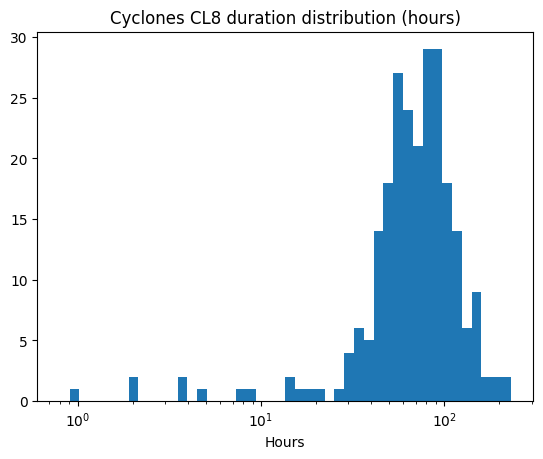

In [77]:
df_bounds8 = cyclones_time_bounds(tracks_df_coord_MED_CL8)
histogram_cyclones_duration(df_bounds8, 8)

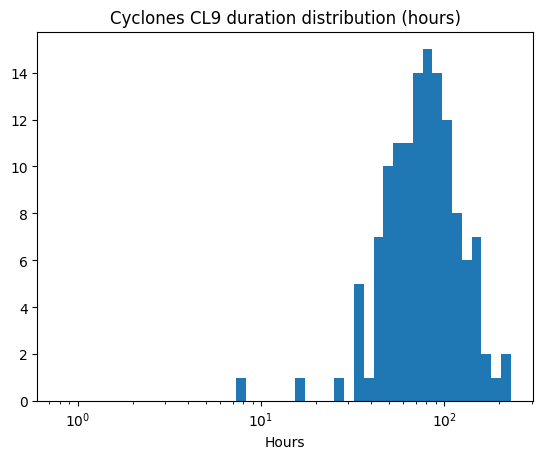

In [78]:
df_bounds9 = cyclones_time_bounds(tracks_df_coord_MED_CL9)
histogram_cyclones_duration(df_bounds9, 9)

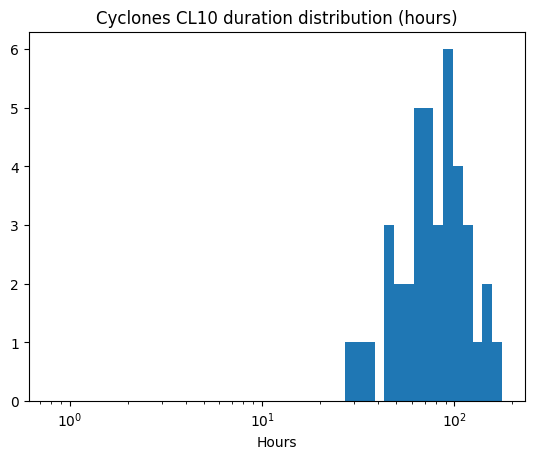

In [79]:
df_bounds10 = cyclones_time_bounds(tracks_df_coord_MED_CL10)
histogram_cyclones_duration(df_bounds10, 10)

# Aggiungo in questo dataframe tracks le colonne per le coordinate in pixel
in modo da non doverli calcolare dopo nel loop sui frames

In [21]:
from scipy.spatial import cKDTree
import numpy as np

from dataset.build_dataset import get_lon_lat_grid_2_pixel

lon_grid, lat_grid, x, y = get_lon_lat_grid_2_pixel(image_w=1290, image_h=420)

# Appiattisci la griglia in array 1D di punti (lon, lat)
grid_points = np.column_stack((lon_grid.ravel(), lat_grid.ravel()))

# Costruisci un KDTree per ricerca veloce
tree = cKDTree(grid_points)

# Funzione vettoriale
def get_cyclone_center_pixel_vector(lat_array, lon_array, image_h=420):
    # Prepara array dei punti da cercare
    query_points = np.column_stack((lon_array, lat_array))
    
    # Trova indice dei punti più vicini nella griglia
    dist, ind = tree.query(query_points)

    # Converti indici lineari in indici 2D
    i, j = np.unravel_index(ind, lon_grid.shape)

    # Ricorda: j → x, i → y (inverto y per altezza immagine)
    x_pix = j
    y_pix = image_h - i

    return x_pix, y_pix


In [22]:
x_pix, y_pix = get_cyclone_center_pixel_vector(tracks_df_MED['lat'].values, tracks_df_MED['lon'].values)
tracks_df_MED['x_pix'] = x_pix
tracks_df_MED['y_pix'] = y_pix


/tmp/ipykernel_3801151/898960626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_df_MED['x_pix'] = x_pix
/tmp/ipykernel_3801151/898960626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_df_MED['y_pix'] = y_pix


In [23]:
tracks_df_MED

,id_cyc_unico,start_time,end_time,lat,lon,time,source,x_pix,y_pix
464444,2009558,2010-12-30 07:00:00,2011-01-03 19:00:00,35.394,13.637,2011-01-01 01:00:00,CL2,628,262
464445,2009558,2010-12-30 07:00:00,2011-01-03 19:00:00,35.485,13.613,2011-01-01 02:00:00,CL2,628,259
464446,2009558,2010-12-30 07:00:00,2011-01-03 19:00:00,35.556,13.667,2011-01-01 03:00:00,CL2,629,257
464447,2009558,2010-12-30 07:00:00,2011-01-03 19:00:00,35.557,13.873,2011-01-01 04:00:00,CL2,635,257
464448,2009558,2010-12-30 07:00:00,2011-01-03 19:00:00,35.518,14.134,2011-01-01 05:00:00,CL2,643,258
...,...,...,...,...,...,...,...,...,...
2204553,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,32.956,36.789,2020-12-17 13:00:00,CL10,1289,348
2204554,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,32.859,36.942,2020-12-17 14:00:00,CL10,1289,349
2204555,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,32.786,37.073,2020-12-17 15:00:00,CL10,1289,349
2204556,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,32.722,37.192,2020-12-17 16:00:00,CL10,1289,350


In [24]:
tracks_df_MED.to_csv("all_manos_CL_pixel.csv", index=False)

In [ ]:
tracks_df_MED = pd.read_csv("manos_allCL_pixel.csv", parse_dates=['time', 'start_time', 'end_time'])

tracks_df_coord['year'] = tracks_df_coord['time'].dt.year
tracks_df_coord['month']= tracks_df_coord['time'].dt.month
tracks_df_coord['day']  = tracks_df_coord['time'].dt.day
tracks_df_coord['hour'] = tracks_df_coord['time'].dt.hour

In [17]:
#tracks_df_coord.nunique()#.source

### filtro quelli che durano meno di '3' giorni

In [69]:
def filter_by_time_span(df, time_column='time', group_column='id_cyc', min_days=3):
    df[time_column] = pd.to_datetime(df[time_column])
    min_span = timedelta(days=min_days)
    time_spans = df.groupby(group_column)[time_column].agg(['min', 'max'])
    time_spans['span'] = time_spans['max'] - time_spans['min']
    valid_ids = time_spans[time_spans['span'] > min_span].index
    return df[df[group_column].isin(valid_ids)]

filtered_df = filter_by_time_span(tracks_df_coord, min_days=3)

In [65]:
filtered_df

,id_cyc,lat,lon,time,source,year,month,day,hour
469167,00009680,44.500,7.000,2011-01-17 18:00:00,CL2,2011,1,17,18
469168,00009680,44.440,7.000,2011-01-17 19:00:00,CL2,2011,1,17,19
469169,00009680,44.392,7.000,2011-01-17 20:00:00,CL2,2011,1,17,20
469170,00009680,44.361,7.000,2011-01-17 21:00:00,CL2,2011,1,17,21
469171,00009680,44.345,7.000,2011-01-17 22:00:00,CL2,2011,1,17,22
...,...,...,...,...,...,...,...,...,...
2204553,00000206,32.956,36.789,2020-12-17 13:00:00,CL10,2020,12,17,13
2204554,00000206,32.859,36.942,2020-12-17 14:00:00,CL10,2020,12,17,14
2204555,00000206,32.786,37.073,2020-12-17 15:00:00,CL10,2020,12,17,15
2204556,00000206,32.722,37.192,2020-12-17 16:00:00,CL10,2020,12,17,16


In [67]:
filtered_df[filtered_df.source=='CL10'].id_cyc.nunique()

23

In [72]:
filtered_df[filtered_df.source=='CL9'].id_cyc.nunique()

73

In [73]:
filtered_df[filtered_df.source=='CL8'].id_cyc.nunique()

120

In [74]:
filtered_df[filtered_df.source=='CL7'].id_cyc.nunique()

171

In [68]:
tracks_df_coord[tracks_df_coord.source=='CL10'].id_cyc.nunique()

40

In [71]:
filtered_df.id_cyc.nunique()

1645

### DF 2020 solo CL7

In [19]:
### filtro via dai metadata_files tutti quelli che non rientrano negli intervalli temporali di copertura date dal df tracks di Manos

dff = df_tracks2020_MED_CL7.sort_values('time')

# Calcola la differenza tra righe successive
expected_freq = pd.Timedelta(hours=1)
time_diff = dff['time'].diff()

# Ogni volta che c'è un "buco", parte un nuovo gruppo
dff['gruppo'] = (time_diff != expected_freq).cumsum()

# Ora trovi gli intervalli min e max per ogni gruppo
intervalli = dff.groupby('gruppo')['time'].agg(['min', 'max']).reset_index(drop=True)

def unisci_intervalli(intervalli, freq=pd.Timedelta(hours=1)):
    intervalli = intervalli.sort_values('min').reset_index(drop=True)
    intervalli_uniti = []
    start, end = intervalli.loc[0, 'min'], intervalli.loc[0, 'max']

    for i in range(1, len(intervalli)):
        next_start = intervalli.loc[i, 'min']
        next_end = intervalli.loc[i, 'max']

        # Se l'intervallo successivo è contiguo o sovrapposto
        if next_start <= end + freq:
            end = max(end, next_end)
        else:
            intervalli_uniti.append((start, end))
            start, end = next_start, next_end

    intervalli_uniti.append((start, end))  # ultimo intervallo
    return pd.DataFrame(intervalli_uniti, columns=['min', 'max'])

intervalli_uniti = unisci_intervalli(intervalli)


#intervalli_uniti

In [20]:
def is_in_any_interval(ts, intervalli):
    return any(start <= ts <= end for start, end in zip(intervalli['min'], intervalli['max']))

# Filtra i file
files_filtrati = [f for f in metadata_2020 if is_in_any_interval(f[1], intervalli_uniti)]

In [21]:
len(files_filtrati)

23281

In [27]:
df_tracks2020_MED_CL7

,lat,lon,time,source,id_cyc_unico,x_pix,y_pix
2037261,37.170,28.510,2020-01-01 12:00:00,CL7,7001680,1036,225
2037262,36.895,28.255,2020-01-01 13:00:00,CL7,7001680,1031,231
2037263,36.696,28.062,2020-01-01 14:00:00,CL7,7001680,1028,237
2037264,36.538,28.015,2020-01-01 15:00:00,CL7,7001680,1028,241
2037265,36.401,28.086,2020-01-01 16:00:00,CL7,7001680,1031,244
...,...,...,...,...,...,...,...
2040303,42.531,17.705,2020-12-27 21:00:00,CL7,7001716,721,85
2040304,42.876,18.055,2020-12-27 22:00:00,CL7,7001716,729,78
2040305,43.343,18.091,2020-12-27 23:00:00,CL7,7001716,727,67
2040306,43.905,17.657,2020-12-28 00:00:00,CL7,7001716,714,54


In [30]:
df_data = calc_master_df(input_dir, files_filtrati, df_tracks2020_MED_CL7)

1000 su 23281
2000 su 23281
3000 su 23281
4000 su 23281
5000 su 23281
6000 su 23281
7000 su 23281
8000 su 23281
9000 su 23281
10000 su 23281
11000 su 23281
12000 su 23281
13000 su 23281
14000 su 23281
15000 su 23281
16000 su 23281
17000 su 23281
18000 su 23281
19000 su 23281
20000 su 23281
21000 su 23281
22000 su 23281
23000 su 23281
Durata calcolo: 0.04 ore


In [63]:
df_data.to_csv("master_data_2020_wID.csv", index=False)

In [2]:
df_data = pd.read_csv("master_data_2020_wID.csv")

# Singole classi

In [2]:
tracks_df_MED = pd.read_csv("manos_allCL_pixel.csv", parse_dates=['time', 'start_time', 'end_time'])
tracks_df_MED.dtypes

id_cyc_unico             int64
start_time      datetime64[ns]
end_time        datetime64[ns]
lat                    float64
lon                    float64
time            datetime64[ns]
source                  object
x_pix                    int64
y_pix                    int64
dtype: object

In [3]:
tracks_df_MED_CL7 = tracks_df_MED[tracks_df_MED.source == 'CL7']
tracks_df_MED_CL8 = tracks_df_MED[tracks_df_MED.source == 'CL8']
tracks_df_MED_CL9 = tracks_df_MED[tracks_df_MED.source == 'CL9']
tracks_df_MED_CL10 = tracks_df_MED[tracks_df_MED.source == 'CL10']

In [20]:
############## tengo solo quelli di classe 7
tracks_df_MED_CL7.to_csv("manos_CL7_pixel.csv", index=False)

# CLASSE 10!
tracks_df_MED_CL10.to_csv("manos_CL10_pixel.csv", index=False)

In [3]:
tracks_df_MED_CL10 = pd.read_csv("manos_CL10_pixel.csv", parse_dates=['time', 'start_time', 'end_time'])

In [4]:
tracks_df_MED_CL10

,id_cyc_unico,start_time,end_time,lat,lon,time,source,x_pix,y_pix
0,10000166,2011-01-17 18:00:00,2011-01-24 10:00:00,44.500,7.000,2011-01-17 18:00:00,CL10,444,39
1,10000166,2011-01-17 18:00:00,2011-01-24 10:00:00,44.440,7.000,2011-01-17 19:00:00,CL10,444,41
2,10000166,2011-01-17 18:00:00,2011-01-24 10:00:00,44.392,7.000,2011-01-17 20:00:00,CL10,444,42
3,10000166,2011-01-17 18:00:00,2011-01-24 10:00:00,44.361,7.000,2011-01-17 21:00:00,CL10,444,43
4,10000166,2011-01-17 18:00:00,2011-01-24 10:00:00,44.345,7.000,2011-01-17 22:00:00,CL10,444,43
...,...,...,...,...,...,...,...,...,...
3392,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,32.956,36.789,2020-12-17 13:00:00,CL10,1289,348
3393,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,32.859,36.942,2020-12-17 14:00:00,CL10,1289,349
3394,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,32.786,37.073,2020-12-17 15:00:00,CL10,1289,349
3395,10000206,2020-12-12 17:00:00,2020-12-17 17:00:00,32.722,37.192,2020-12-17 16:00:00,CL10,1289,350


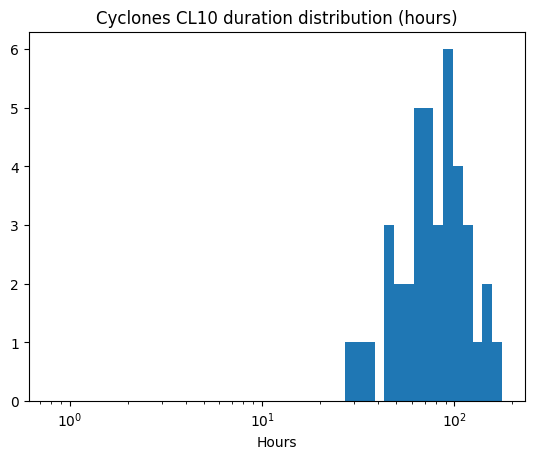

In [8]:
df_bounds10 = cyclones_time_bounds(tracks_df_MED_CL10)
histogram_cyclones_duration(df_bounds10, 10)